In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
entries = ['^GDAXI','DTE.DE','SAP.DE','FME.DE','BEI.DE','DB1.DE','IFX.DE','WDI.DE','ADS.DE',
           'FIE.DE','FNTN.DE','DRW3.DE','AFX.DE','DLG.DE','SOW.DE','HNR1.DE',
           'AAPL','MSFT','IBM','PVH']
merged_quotes = pd.DataFrame()

for symbol in entries:
    ticks = yf.Ticker(symbol)
    h = ticks.history(start='2020-01-20', end='2020-04-20')
    history = h['Close']
    if merged_quotes.size == 0:
        merged_quotes = history.to_frame()
    else:
        merged_quotes = pd.merge(merged_quotes, history.to_frame(), on='Date')

In [9]:
merged_quotes.columns=entries
merged_quotes

,^GDAXI,DTE.DE,SAP.DE,FME.DE,BEI.DE,DB1.DE,IFX.DE,WDI.DE,ADS.DE,FIE.DE,FNTN.DE,DRW3.DE,AFX.DE,DLG.DE,SOW.DE,HNR1.DE,AAPL,MSFT,IBM,PVH
Date,,,,,,,,,,,,,,,,,,,,
2020-01-21,13555.87,14.09,126.20,69.72,105.80,148.60,20.79,128.85,311.50,72.90,20.11,51.45,118.62,43.40,33.25,178.5,315.82,166.05,137.73,98.66
2020-01-22,13515.75,14.12,126.60,70.00,105.50,150.55,21.08,129.15,315.05,72.85,20.11,50.90,118.72,43.00,33.48,179.2,316.95,165.25,142.40,97.97
2020-01-23,13388.42,13.93,123.84,69.98,104.75,148.05,21.26,134.60,310.60,72.50,19.97,51.20,117.83,42.88,33.38,178.1,318.47,166.27,141.39,96.78
2020-01-24,13576.68,14.06,126.90,72.02,106.50,150.10,21.73,140.60,313.00,72.70,20.06,53.20,119.22,43.11,33.74,179.4,317.56,164.59,139.11,94.84
2020-01-27,13204.77,13.83,122.46,70.82,103.95,147.60,20.98,133.25,300.00,72.55,19.95,52.45,117.03,41.44,32.66,176.0,308.22,161.84,137.19,91.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-09,10564.74,12.36,110.00,63.24,91.40,132.65,16.23,112.88,224.30,58.10,16.31,86.50,95.40,27.76,28.28,138.1,267.99,165.14,121.50,49.51
2020-04-14,10696.56,12.52,112.00,64.06,94.26,135.65,16.84,121.90,224.90,59.30,16.63,81.90,94.05,27.81,28.80,135.0,287.05,173.70,123.91,47.96
2020-04-15,10279.76,12.19,108.30,62.42,92.98,133.85,15.30,117.38,214.30,58.60,16.01,85.10,90.95,26.44,28.24,132.9,284.43,171.88,118.69,42.33


In [10]:
pct_changes = pd.DataFrame()
for e in entries:
    pct_changes[e] = merged_quotes[e].pct_change().copy()

In [11]:
correlation_matrix = pct_changes.corr()
correlation_matrix

,^GDAXI,DTE.DE,SAP.DE,FME.DE,BEI.DE,DB1.DE,IFX.DE,WDI.DE,ADS.DE,FIE.DE,FNTN.DE,DRW3.DE,AFX.DE,DLG.DE,SOW.DE,HNR1.DE,AAPL,MSFT,IBM,PVH
^GDAXI,1.000000,0.828184,0.897202,0.615262,0.679830,0.820311,0.858352,0.812172,0.770379,0.788127,0.812795,-0.020462,0.771338,0.754734,0.658390,0.909096,0.642097,0.619417,0.720739,0.749119
DTE.DE,0.828184,1.000000,0.659284,0.585773,0.522458,0.636108,0.653756,0.607566,0.688631,0.591294,0.770183,-0.100473,0.637271,0.571571,0.492257,0.730189,0.468017,0.488908,0.537731,0.571847
SAP.DE,0.897202,0.659284,1.000000,0.612235,0.642919,0.727035,0.774564,0.712178,0.666264,0.698922,0.683009,0.180401,0.758163,0.724489,0.688621,0.763943,0.615251,0.598830,0.714896,0.638415
FME.DE,0.615262,0.585773,0.612235,1.000000,0.504856,0.506937,0.504788,0.479227,0.400899,0.368078,0.593072,0.095297,0.466101,0.387091,0.494408,0.530224,0.514602,0.478976,0.542759,0.433332
BEI.DE,0.679830,0.522458,0.642919,0.504856,1.000000,0.554862,0.433851,0.607738,0.522695,0.357041,0.584825,0.067069,0.426666,0.295711,0.439975,0.753522,0.551771,0.503739,0.596125,0.436161
DB1.DE,0.820311,0.636108,0.727035,0.506937,0.554862,1.000000,0.739659,0.676818,0.572161,0.744374,0.631037,-0.049853,0.742577,0.629691,0.493805,0.712541,0.564840,0.565676,0.585280,0.595772
IFX.DE,0.858352,0.653756,0.774564,0.504788,0.433851,0.739659,1.000000,0.705580,0.670764,0.786906,0.676987,-0.089975,0.725481,0.752736,0.661019,0.714269,0.592836,0.565648,0.658535,0.723231
WDI.DE,0.812172,0.607566,0.712178,0.479227,0.607738,0.676818,0.705580,1.000000,0.726513,0.663315,0.563673,0.074901,0.594460,0.655836,0.596119,0.773892,0.535702,0.423805,0.505203,0.593724
ADS.DE,0.770379,0.688631,0.666264,0.400899,0.522695,0.572161,0.670764,0.726513,1.000000,0.632226,0.547355,0.051899,0.725000,0.574394,0.494690,0.746414,0.346745,0.308613,0.465178,0.620116
FIE.DE,0.788127,0.591294,0.698922,0.368078,0.357041,0.744374,0.786906,0.663315,0.632226,1.000000,0.529485,-0.092496,0.713659,0.794669,0.524296,0.639062,0.442409,0.430290,0.546031,0.581359


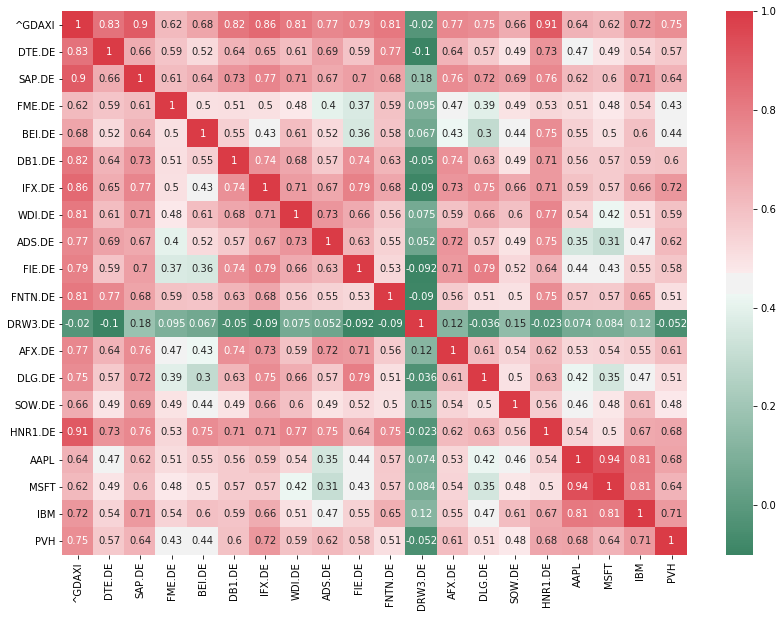

In [12]:
fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches

#corr.style.background_gradient(cmap='coolwarm')
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cbar_kws={},
            cmap = cmap,
            annot=True,
            ax=ax)